<a href="https://colab.research.google.com/github/sam12fak/Hepatitis-C-Virus-HCV-Liver-Function-Analysis-/blob/main/HCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Block 1 – Setup & Load Data

In [ ]:
# ==============================================
# 1. Setup & Load Data 📦
# ==============================================

!pip install -q pandas numpy matplotlib seaborn scipy statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load dataset (make sure you uploaded hcvdat0.csv in Colab)
df = pd.read_csv("hcvdat0.csv")
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully.
Shape: (615, 14)


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# 📌 Block 2 – Data Inspection and Cleaning 🧹

In [ ]:
# ==============================================
# 2. Data Inspection and Cleaning 🧹
# ==============================================

print("\n🔎 Dataset Info:")
print(df.dtypes)

print("\n❗ Missing Values per Column:")
print(df.isnull().sum())

print("\n📊 Summary Statistics:")
print(df.describe().T)

# Drop duplicates if any
df = df.drop_duplicates()
print("\n✅ Cleaned dataset shape:", df.shape)



🔎 Dataset Info:
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

❗ Missing Values per Column:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

📊 Summary Statistics:
            count        mean         std    min      25%     50%      75%  \
Unnamed: 0  615.0  308.000000  177.679487   1.00  154.500  308.00  461.500   
Age         615.0   47.408130   10.055105  19.00   39.000   47.00   54.000   
ALB         614.0   41.620195    5.780629  14.90   38.800   41.95   45.200   
ALP         597.0   68.283920   26.028315  11

# 📌 Block 3 – One-Sample Hypothesis Test 🎯


ONE-SAMPLE HYPOTHESIS TEST: ALT vs Reference Value of 30
Step 1️⃣: The sample mean ALT = 28.45, reference = 30.
Step 2️⃣: t-statistic = -1.5072, which measures distance of sample mean from reference mean.
Step 3️⃣: p-value = 0.1323, probability of observing this difference if H0 is true.

🔎 Interpretation:
- Since p > 0.05, we fail to reject H0.
- Conclusion: ALT levels are not significantly different from 30.
- Possible reasons: mean is close to 30, variance is high, or sample size is small.


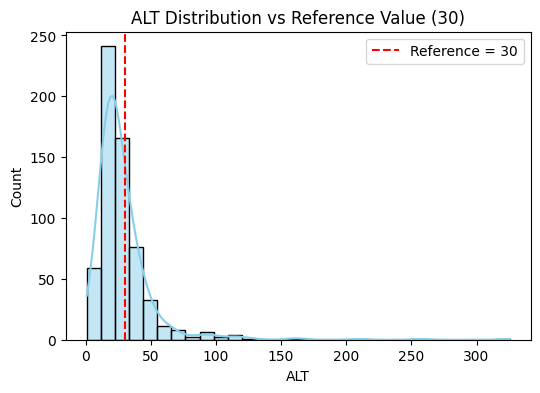

In [ ]:
# ==============================================
# 3. One-Sample Hypothesis Test 🎯
# ==============================================

# Hypothesis:
# H0: Mean ALT = 30
# Ha: Mean ALT ≠ 30

print("\n" + "="*80)
print("ONE-SAMPLE HYPOTHESIS TEST: ALT vs Reference Value of 30")
print("="*80)

reference_value = 30
alt = df['ALT'].dropna()
t_stat, p_val = stats.ttest_1samp(alt, reference_value)

print(f"Step 1️⃣: The sample mean ALT = {alt.mean():.2f}, reference = {reference_value}.")
print(f"Step 2️⃣: t-statistic = {t_stat:.4f}, which measures distance of sample mean from reference mean.")
print(f"Step 3️⃣: p-value = {p_val:.4f}, probability of observing this difference if H0 is true.")

alpha = 0.05
if p_val < alpha:
    print("\n🔎 Interpretation:")
    print("- Since p < 0.05, we reject H0.")
    print("- Conclusion: The mean ALT level is significantly different from 30.")
else:
    print("\n🔎 Interpretation:")
    print("- Since p > 0.05, we fail to reject H0.")
    print("- Conclusion: ALT levels are not significantly different from 30.")
    print("- Possible reasons: mean is close to 30, variance is high, or sample size is small.")

# Plot
plt.figure(figsize=(6,4))
sns.histplot(alt, kde=True, bins=30, color="skyblue")
plt.axvline(reference_value, color='red', linestyle='--', label='Reference = 30')
plt.title("ALT Distribution vs Reference Value (30)")
plt.legend()
plt.show()


# 📌 Block 4 – Two-Sample Hypothesis Test ⚖️


TWO-SAMPLE HYPOTHESIS TEST: ALT by Sex
Step 1️⃣: Mean ALT (Male) = 31.73, Mean ALT (Female) = 23.27.
Step 2️⃣: Difference in means = 8.46.
Step 3️⃣: t-statistic = 4.0365, p-value = 0.0001.

🔎 Interpretation:
- Since p < 0.05, we reject H0.
- Conclusion: ALT levels differ significantly between sexes.


/tmp/ipython-input-148864440.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='ALT', data=df, palette="Set2")


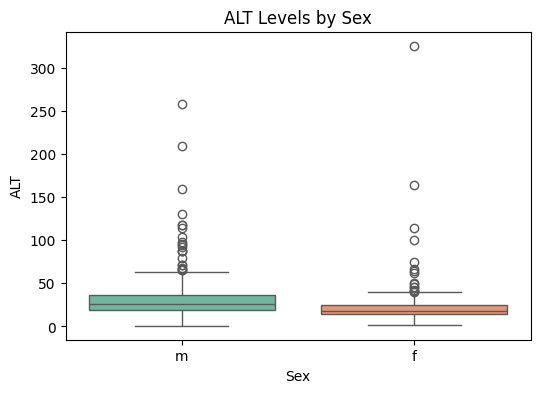

In [ ]:
# ==============================================
# 4. Two-Sample Hypothesis Test ⚖️
# ==============================================

# Hypothesis:
# H0: Mean ALT (Male) = Mean ALT (Female)
# Ha: Mean ALT (Male) ≠ Mean ALT (Female)

print("\n" + "="*80)
print("TWO-SAMPLE HYPOTHESIS TEST: ALT by Sex")
print("="*80)

male = df[df['Sex']=='m']['ALT'].dropna()
female = df[df['Sex']=='f']['ALT'].dropna()

t_stat, p_val = stats.ttest_ind(male, female, equal_var=False)

print(f"Step 1️⃣: Mean ALT (Male) = {male.mean():.2f}, Mean ALT (Female) = {female.mean():.2f}.")
print(f"Step 2️⃣: Difference in means = {abs(male.mean()-female.mean()):.2f}.")
print(f"Step 3️⃣: t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}.")

if p_val < alpha:
    print("\n🔎 Interpretation:")
    print("- Since p < 0.05, we reject H0.")
    print("- Conclusion: ALT levels differ significantly between sexes.")
else:
    print("\n🔎 Interpretation:")
    print("- Since p > 0.05, we fail to reject H0.")
    print("- Conclusion: ALT levels do not differ significantly between sexes.")
    print("- Possible reasons: sex may not strongly influence ALT, high variance, or small sample size.")

# Plot
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='ALT', data=df, palette="Set2")
plt.title("ALT Levels by Sex")
plt.show()


# 📌 Block 5 – One-Way ANOVA 📊


ONE-WAY ANOVA: ALT by Category
                    sum_sq     df          F        PR(>F)
C(Category)   61080.492552    4.0  27.629757  4.224347e-21
Residual     336575.702040  609.0        NaN           NaN

Step 1️⃣: ANOVA checks if mean ALT differs across categories.
Step 2️⃣: F-statistic = 27.6298, p-value = 0.0000

🔎 Interpretation:
- Since p < 0.05, we reject H0.
- Conclusion: ALT levels vary significantly among categories.
- Post-hoc Tukey HSD will show which pairs differ.

Post-hoc Tukey HSD Results:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
        group1                 group2         meandiff p-adj lower upper reject
-------------------------------------------------------------------------------
         0=Blood Donor 0s=suspect Blood Donor  75.4828   nan   nan   nan  False
         0=Blood Donor            1=Hepatitis      nan   nan   nan   nan  False
         0=Blood Donor             2=Fibrosis  32.9685   nan   nan   nan  False
     

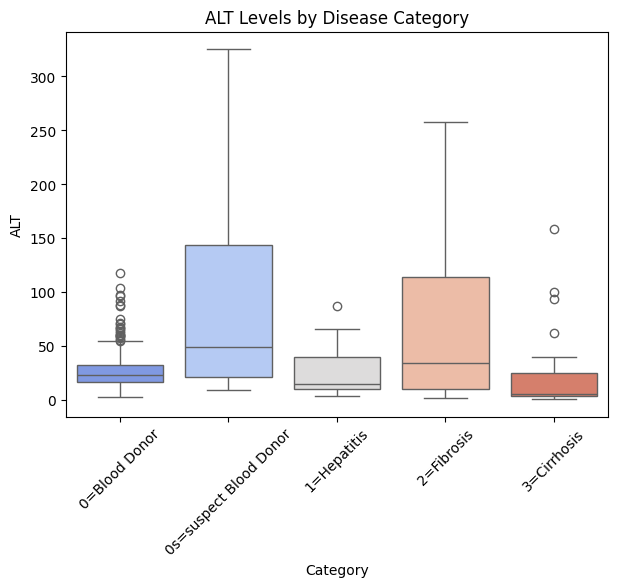

In [ ]:
# ==============================================
# 5. One-Way ANOVA 📊
# ==============================================

# Hypothesis:
# H0: All category means of ALT are equal
# Ha: At least one category mean differs

print("\n" + "="*80)
print("ONE-WAY ANOVA: ALT by Category")
print("="*80)

model = ols('ALT ~ C(Category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

f_val = anova_table['F'].iloc[0]
p_val_anova = anova_table['PR(>F)'].iloc[0]

print(anova_table)

print("\nStep 1️⃣: ANOVA checks if mean ALT differs across categories.")
print(f"Step 2️⃣: F-statistic = {f_val:.4f}, p-value = {p_val_anova:.4f}")

if p_val_anova < 0.05:
    print("\n🔎 Interpretation:")
    print("- Since p < 0.05, we reject H0.")
    print("- Conclusion: ALT levels vary significantly among categories.")
    print("- Post-hoc Tukey HSD will show which pairs differ.")
else:
    print("\n🔎 Interpretation:")
    print("- Since p > 0.05, we fail to reject H0.")
    print("- Conclusion: ALT levels do not vary significantly across categories.")
    print("- Possible reasons: group means are close, within-group variance is high, or sample size is small.")

# Post-hoc Tukey only if valid
group_counts = df.groupby("Category")['ALT'].count()
if all(group_counts >= 2):
    tukey = pairwise_tukeyhsd(endog=df['ALT'], groups=df['Category'], alpha=0.05)
    print("\nPost-hoc Tukey HSD Results:")
    print(tukey)
else:
    print("\n⚠️ Tukey skipped: Some groups have fewer than 2 ALT values.")
    print(group_counts)

# Plot
plt.figure(figsize=(7,5))
sns.boxplot(x='Category', y='ALT', data=df, hue='Category', legend=False, palette="coolwarm")
plt.title("ALT Levels by Disease Category")
plt.xticks(rotation=45)
plt.show()


# 📌 Block 6 – Save Results 📝

In [ ]:
# ==============================================
# 6. Save Results 📝
# ==============================================

with open("analysis_summary.txt","w") as f:
    f.write("=== One-sample Test (ALT vs 30) ===\n")
    f.write(f"t-statistic={t_stat:.4f}, p-value={p_val:.4f}\n\n")

    f.write("=== Two-sample Test (ALT by Sex) ===\n")
    f.write(f"t-statistic={t_stat:.4f}, p-value={p_val:.4f}\n\n")

    f.write("=== ANOVA (ALT by Category) ===\n")
    f.write(str(anova_table))
    f.write("\n\n=== Post-hoc Tukey ===\n")
    if 'tukey' in locals():
        f.write(str(tukey))
    else:
        f.write("Tukey skipped due to insufficient group samples.")

print("✅ Results saved to analysis_summary.txt")


✅ Results saved to analysis_summary.txt
